In [1]:
# Standard Library Imports (if any)

# Third-party Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display, HTML
from adjustText import adjust_text
from sklearn.preprocessing import StandardScaler
from linearmodels.panel import PanelOLS

# Local Module Imports
from utils import *
from data_handling import *
from plot import *
from data_handling.data_processor import *

In [2]:
major = COUNTRIES.MAJOR
offshore = COUNTRIES.OFFSHORE
sample = major + offshore
period = (2001, 2004)
dm = DataManager(
    raw_dir = "../data/raw",
    save_dir = "../data/clean"
)
ds_full = dm.get_dataset("ds")
fed_full = dm.get_dataset("fed")
# dm.clean_data()
# dm.save_data()

In [3]:
# Access datasets
cpis = dm.get_dataset("cpis")
ds = dm.get_dataset("ds")
fed = dm.get_dataset("fed")
wb = dm.get_dataset("wb")
wfe = dm.get_dataset("wfe")
gdp = dm.get_dataset("gdp")

major = COUNTRIES.MAJOR
offshore = COUNTRIES.OFFSHORE
sample = major + offshore

In [7]:
dm.get_dataset("ds")

TypeError: Can't instantiate abstract class DataFrame without an implementation for abstract method 'get_data'

TypeError: Can't instantiate abstract class DataFrame without an implementation for abstract method 'get_data'

Date
1999-01-05    1.358200
1999-01-06    2.214041
1999-01-07   -0.205133
1999-01-08    0.422136
1999-01-11   -0.879151
                ...   
2002-12-19   -0.770939
2002-12-20    1.301669
2002-12-23    0.180851
2002-12-24   -0.547152
2002-12-26   -0.314856
Name: Adj Close, Length: 1000, dtype: float64
Iteration:      1,   Func. Count:      7,   Neg. LLF: 36896363807.16714
Iteration:      2,   Func. Count:     16,   Neg. LLF: 27815.18923356154
Iteration:      3,   Func. Count:     24,   Neg. LLF: 17838524.690932572
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1141411345.1881666
Iteration:      5,   Func. Count:     40,   Neg. LLF: 58949700.48735352
Iteration:      6,   Func. Count:     47,   Neg. LLF: 1720.4902610823374
Iteration:      7,   Func. Count:     54,   Neg. LLF: 2632.1906597413695
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1714.1602006286594
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1703.0341211267987
Iteration:     10,   Func. Count:     75, 

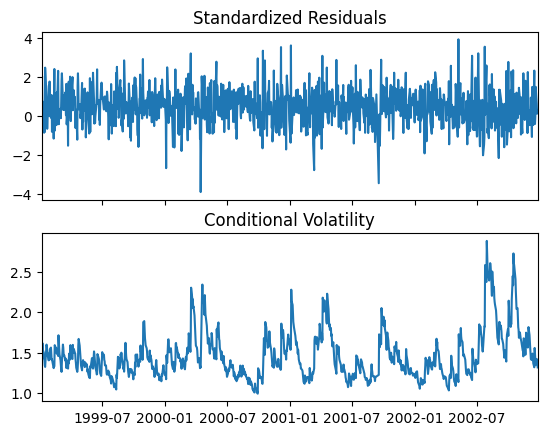

In [74]:
import numpy as np
from arch.univariate import ARCHInMean, GARCH, arch_model
from arch.data.sp500 import load
sp500 = load()
returns = 100 * sp500["Adj Close"].pct_change().dropna()[0:1000]
# returns = 100 * ds_full.get_data(["US"], (None, 2004)).iloc[0,:].pct_change().dropna()
print(returns)
gim = ARCHInMean(returns, volatility=GARCH())
res_gim = gim.fit()
print(res_gim.summary())
fig = res_gim.plot()